In [13]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt 

In [14]:
k0=0.1
k1=0.125
k2=0.2
b0=0.145

A=np.array([[-k0-k1,k1],
            [k2,-k2]])

B=np.array([[b0],
            [0]])

C=np.array([[1,0]])

In [15]:
eig_d=np.array([-2,-3])
V=ctrl.obsv(A,C.T)
V

#si el rango de la matrix de observabiliad es n entonces el sistema es observable
print("Rango de la matriz de observabilidad es", np.linalg.matrix_rank(V))

print(np.linalg.eigvals(A))

Rango de la matriz de observabilidad es 2
[-0.37110722 -0.05389278]


In [16]:
eig_d=[-2,-3] #valores random para verficar 
L=ctrl.place(A, C.T, eig_d).T
L

array([[ 4.575],
       [25.325]])

In [17]:
print(A-L*C) #Es la matriz A con la ganancia L 

#print(np.linalg.eigvals(A-L*C))

[[ -4.8     0.125]
 [-25.125  -0.2  ]]


In [28]:
#vamos a verificar por Euler 
#parametros de simulacion 
h=1e-2
tfin=10
#t=np.arange(0,tfin-1,h)
N=int(np.ceil((tfin-h)/h))

#estados de la planta 
c1=np.zeros(N)
c2=np.zeros(N)

#estados estimados 
#c1_e=np.zeros(N)
#c1_e[0]=1
#c2_e=np.zeros(N)
#c2_e[0]=1

#also we can concatenate the ci of the observables 
ci_obs=[1,1]
c1_e=np.hstack((ci_obs[0],np.zeros(N-1)))
c2_e=np.hstack((ci_obs[1],np.zeros(N-1)))

#entrada
u=np.ones(N)

for k in range (N-1): 
    #modelo compartimental que descibe la [] de farmaco en el plasma sanguineo 
    c1[k+1]=c1[k]+h*((-k0-k1)*c1[k]+k1*c2[k]+b0*u[k])
    c2[k+1]=c2[k]+h*(k2*c1[k]-k2*c2[k])
    
    #observador de estados tipo Luenberger 
    c1_e[k+1]=c1_e[k]+h*((-k0-k1)*c1_e[k]+k1*c2_e[k]+b0*u[k]+L[0,0]*(c1[k]-c1_e[k]))
    c2_e[k+1]=c2_e[k]+h*(k2*c1_e[k]-k2*c2_e[k]+L[1,0]*(c1[k]-c1_e[k]))

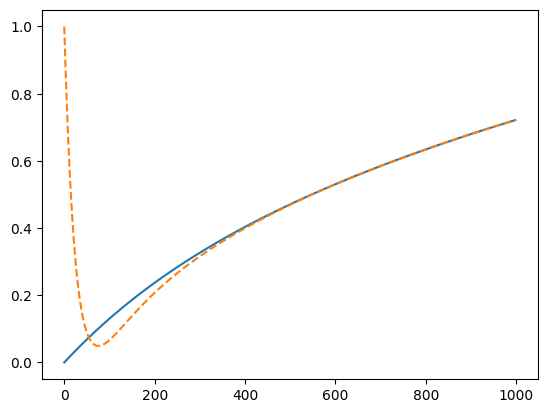

In [29]:
#en teoria ya lo tenemos, haremos un subplot 

plt.plot(c1)
plt.plot(c1_e, '--')

plt.show()

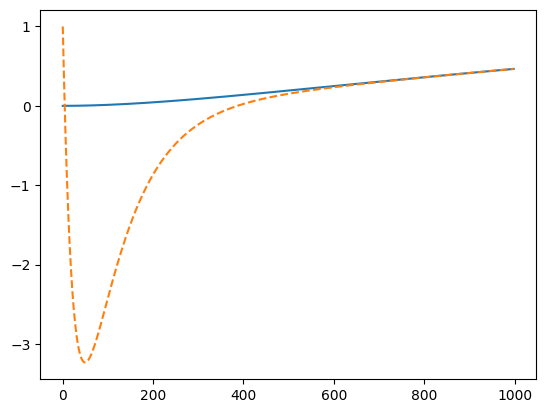

In [30]:
plt.plot(c2)
plt.plot(c2_e, '--')

plt.show()